### Bounding Box request Example

Import necessary libraries (Uncomment logging if you want to enable it)

In [1]:
#import logging

#logger = logging.getLogger('')
#logger.setLevel(logging.DEBUG)

import os
import json


from covjsonkit.api import Covjsonkit
from polytope_mars.api import PolytopeMars
from conflator import Conflator
from polytope_mars.config import PolytopeMarsConfig 

import earthkit.data
import earthkit.plots

Load options needed to pull operational data

In [2]:
options = {
            "axis_config": [
                {
                    "axis_name": "date",
                    "transformations": [{"name": "merge", "other_axis": "time", "linkers": ["T", "00"]}],
                },
                {
                    "axis_name": "values",
                    "transformations": [
                        {
                            "name": "mapper",
                            "type": "octahedral",
                            "resolution": 1280,
                            "axes": ["latitude", "longitude"],
                        }
                    ],
                },
                {"axis_name": "latitude", "transformations": [{"name": "reverse", "is_reverse": True}]},
                {"axis_name": "longitude", "transformations": [{"name": "cyclic", "range": [0, 360]}]},
                {"axis_name": "step", "transformations": [{"name": "type_change", "type": "int"}]},
                {"axis_name": "number", "transformations": [{"name": "type_change", "type": "int"}]},
            ],
            "compressed_axes_config": [
                "longitude",
                "latitude",
                "levtype",
                "step",
                "date",
                "domain",
                "expver",
                "param",
                "class",
                "stream",
                "type",
            ],
            "pre_path": {"class": "od", "expver": "0001", "levtype": "sfc", "stream": "oper", "type": "fc"},
        }

Make polytope-mars request for bounding box over Lisbon

In [3]:
# bounding box test
request = {
    "class": "od",
    "stream" : "oper",
    "type" : "fc",
    "date" : "20240915",
    "time" : "1200",
    "levtype" : "sfc",
    "expver" : "0001", 
    "domain" : "g",
    "param" : "167/169",
    "step" : "0",
    "feature" : {
        "type" : "boundingbox",
        "points": [[38, -9.5], [39, -8.5]],
    },
}

result = PolytopeMars().extract(request)

Gribjump: Union request is retrieve,class=od,date=20240915,time=1200,domain=g,expver=0001,levtype=sfc,param=169/167,step=0,stream=oper,type=fc
Gribjump Engine: Flattened requests and constructed union request: 0.015082 second elapsed, 0.014404 second cpu
Gribjump Engine: Called fdb.list and constructed file map: 0.095661 second elapsed, 0.079462 second cpu
Starting 8 threads
Gribjump Engine: Enqueued 2 file tasks: 0.000764 second elapsed, 0.000994 second cpu
Gribjump Progress: 1 of 2 tasks complete
Gribjump Progress: 2 of 2 tasks complete
Gribjump Engine: All tasks finished: 0.149254 second elapsed, 0.160928 second cpu
Gribjump Engine: Repackaged results: 2.3e-05 second elapsed, 2.2e-05 second cpu
{'2024-09-15T12:00:00Z': {0: {'169': {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Show resulting covjson

In [4]:
result

{'type': 'CoverageCollection',
 'domainType': 'MultiPoint',
 'coverages': [{'mars:metadata': {'class': 'od',
    'Forecast date': '2024-09-15T12:00:00Z',
    'domain': 'g',
    'expver': '0001',
    'levtype': 'sfc',
    'step': 0,
    'stream': 'oper',
    'type': 'fc',
    'number': 0},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'t': {'values': ['2024-09-15T12:00:00Z']},
     'composite': {'dataType': 'tuple',
      'coordinates': ['x', 'y', 'z'],
      'values': [[38.066782975752, 350.551816958277, 0],
       [38.066782975752, 350.672947510094, 0],
       [38.066782975752, 350.794078061911, 0],
       [38.066782975752, 350.915208613728, 0],
       [38.066782975752, 351.036339165545, 0],
       [38.066782975752, 351.157469717362, 0],
       [38.066782975752, 351.278600269179, 0],
       [38.066782975752, 351.399730820996, 0],
       [38.137081743359, 350.539083557951, 0],
       [38.137081743359, 350.660377358491, 0],
       [38.137081743359, 350.78167115903,

Convert and display as xarray

In [5]:
decoder = Covjsonkit().decode(result)
ds = decoder.to_xarray()
ds

<xarray.Dataset> Size: 6kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 116)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2024-09-15T12:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 928B 0 1 2 3 4 5 6 ... 109 110 111 112 113 114 115
    x          (points) float64 928B 38.07 38.07 38.07 ... 38.98 38.98 38.98
    y          (points) float64 928B 350.6 350.7 350.8 ... 351.2 351.4 351.5
    z          (points) float64 928B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    ssrd       (datetimes, number, steps, points) float64 928B 0.0 0.0 ... 0.0
    2t         (datetimes, number, steps, points) float64 928B 291.9 ... 305.9
Attributes:
    class:          od
    Forecast date:  2024-09-15T12:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    step:           0
    stream:         oper
    type:           fc
    number:         0
    date:           2024-09-15T12:00:00Z

In [18]:
with open('test_bounding_box.covjson', 'w') as fp:
    json.dump(result, fp)

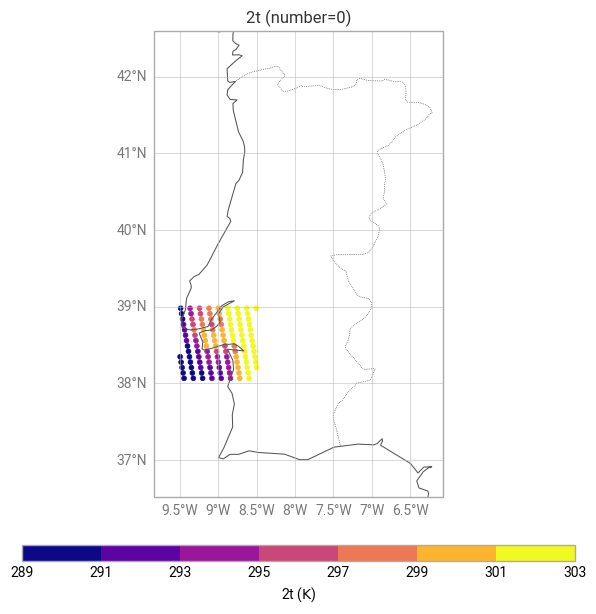

In [19]:
chart = earthkit.plots.Map(domain="Portugal")
chart.point_cloud(ds['2t'].isel(number=0), x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()